First few rows:
   sunlight_hours  watering_freq_per_week soil_type water_need
0        7.789136                       6     sandy        low
1       11.668008                       4     loamy       high
2        9.003943                       2     loamy        low
3       11.148641                       5     loamy        low
4        9.384333                       2      clay       high

Column info:
sunlight_hours            float64
watering_freq_per_week      int64
soil_type                  object
water_need                 object
dtype: object

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.38      0.27      0.32        11
           2       0.20      0.25      0.22         4

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.32      0.30      0.30        20



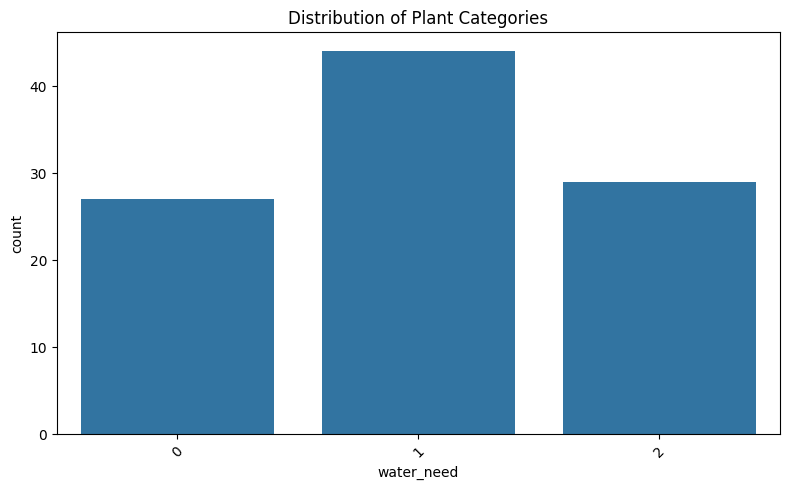

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/plants.csv'
df = pd.read_csv(file_path)

print("First few rows:")
print(df.head())
print("\nColumn info:")
print(df.dtypes)

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=target_column)
plt.title('Distribution of Plant Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()